In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


Shape of the dataset: (44898, 5)
First few rows:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  
0  December 31, 2017  fake  
1  December 31, 2017  fake  
2  December 30, 2017  fake  
3  December 29, 2017  fake  
4  December 25, 2017  fake  
Last few rows:
                                        

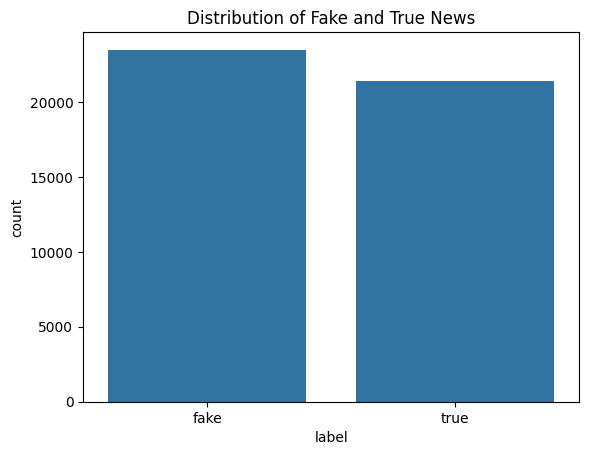

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Shape of the TF-IDF matrix: (44898, 182834)


In [9]:
# Load datasets
fake_file_path = '/content/Fake.csv'
true_file_path = '/content/True.csv'

fake_df = pd.read_csv(fake_file_path)
true_df = pd.read_csv(true_file_path)

# Add label columns
fake_df['label'] = 'fake'
true_df['label'] = 'true'

# Combine datasets
combined_df = pd.concat([fake_df, true_df], ignore_index=True)

# Data analysis
print("Shape of the dataset:", combined_df.shape)
print("First few rows:")
print(combined_df.head())
print("Last few rows:")
print(combined_df.tail())
print("Value counts for labels:")
print(combined_df['label'].value_counts())

# Plot distribution of labels
sns.countplot(x='label', data=combined_df)
plt.title('Distribution of Fake and True News')
plt.show()

# Initialize NLTK components
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Stem tokens
    # Alternatively: tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
combined_df['clean_text'] = combined_df['text'].apply(preprocess_text)  # Replace 'text_column' with your actual column name

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(combined_df['clean_text'])

print("Shape of the TF-IDF matrix:", X.shape)

# If necessary, reduce dataset size and reapply preprocessing and vectorization
sampled_df = combined_df.sample(n=1000, random_state=1)
sampled_df['clean_text'] = sampled_df['subject'].apply(preprocess_text)  # Replace 'text_column'
X_sampled = vectorizer.fit_transform(sampled_df['clean_text'])



In [7]:
print(combined_df.columns)

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
